## @author: Arshad Mehtiyev

## This program creates, sets and runs Neural Network (aka Multi-layer perceptron) with 2 hidden layers, and this makes total of 4 layers (including input and output layers). Structure is:
### input layer -> hidden layer 1 -> hidden layer 2 -> output layer 
    
### This notebook is written to work with MINST dataset imported from Keras. Adjustment of the Hyperparameters can be done in the main() function. 

#### Importing required libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt

### Defining sigmoid function 

In [5]:
def sigmoid(x):
    sig_func = 1/(1+np.exp(-x))
    return sig_func

### Defining Neural Network class

In [6]:
class neuralNetwork:
    
    # Initializing the Neural Network
    def __init__(self, 
                 input_nodes, 
                 hidden_nodes_1, 
                 hidden_nodes_2, 
                 output_nodes, 
                 learning_rate):
        
        # Setting amount of nodes for input, hidden, output nodes
        self.innode = input_nodes
        self.hnode_1 = hidden_nodes_1
        self.hnode_2 = hidden_nodes_2
        self.onode = output_nodes
        
        # Initializing link weight matrices:
        # wih1 - weigths from input layer to hidden layer 1
        # wh1h2 - weights from hidden layer 1 to hidden layer 2
        # wh2o - weights from hidden layer 2 to outputlayer
        # weights inside the matrix are w_i_j, - from node i iof first layer 
        # to node j second layer
        #For example 
        # w11 w21 w31...
        # w12 W22 W32...
        # w13 w23 w33...
        
        # Using inverse square-root division to avoid building up inccreased 
        # weight multiplaction sum. This is based on number of input links.
        self.wih1 = np.random.uniform(-0.99999999/np.sqrt(self.innode),
                                      1/np.sqrt(self.innode),
                                      (self.hnode_1, self.innode))
        self.wh1h2 = np.random.uniform(-0.99999999/np.sqrt(self.hnode_1),
                                       1/np.sqrt(self.hnode_1),
                                       (self.hnode_2, self.hnode_1))
        self.wh2o = np.random.uniform(-0.99999999/np.sqrt(self.hnode_2),
                                      1/np.sqrt(self.hnode_2),
                                      (self.onode, self.hnode_2))
        
        # Defining learning rate
        self.lrate = learning_rate
        
        # Defining sigmoid type activation function
        self.activ_func = lambda x: sigmoid(x)
        
        # Defning list for Sum of Squared Errors 
        self.sse = []
                
        
    
    # Training of the neural network
    def train(self, inputs_list, targets_list):
        # converting inputs to 2D array
        inputs = np.array(inputs_list, ndmin=2).T  
        targets = np.array(targets_list, ndmin=2).T 
        
        ## Processing from input to the final output - layer by layer        
        # Hidden layer 1 with output sigmoid function applied 
        hidden_inputs_1 = np.dot(self.wih1, inputs)
        hidden_outputs_1 = self.activ_func(hidden_inputs_1)
        
        # Hidden layer 2 with output sigmoid function applied 
        hidden_inputs_2 = np.dot(self.wh1h2, hidden_outputs_1)
        hidden_outputs_2 = self.activ_func(hidden_inputs_2)
        
        # Output layer with output sigmoid function applied 
        output_in = np.dot(self.wh2o, hidden_outputs_2)
        output_out = self.activ_func(output_in)
        
        ### Backpropogation steps
        # Calculating the error in the output (the last layer)
        output_error= targets - output_out
        
        # Calculating the squared error for the later use
        self.sse = (output_error)**2
    
        # Calcualting Error on the 2nd hidden layer
        hidden_2_error = np.dot(self.wh2o.T, output_error)
        
        # Calculating error on the 1st hidden layer
        hidden_1_error = np.dot(self.wh1h2.T, hidden_2_error)
        
        ## Updating weights for the links between the layers
        # Updating weights between hidden layer 2 and output layer
        self.wh2o += self.lrate * np.dot((output_error * output_out * 
                                          (1.0 - output_out)),
                                         np.transpose(hidden_outputs_2))
        
         # Updating weights between hidden layer 1 and hidden layer 2
        self.wh1h2 += self.lrate * np.dot((hidden_2_error * hidden_outputs_2 * 
                                           (1.0 - hidden_outputs_2)),
                                         np.transpose(hidden_outputs_1))
        
        # Updating weights between input layer and hidden layer 1
        self.wih1 += self.lrate * np.dot((hidden_1_error * hidden_outputs_1 * 
                                          (1.0 - hidden_outputs_1)),
                                             np.transpose(inputs))
    
    
    # This function returns the squared error array to find the MSE at the end
    def sse(self):
        return self.sse
    
    # Function for updating learning rate
    def lr_update(self, gamma):
        self.lrate=self.lrate*gamma
     
    # Function for returning current Learning rate value
    def lr_info(self):
        return self.lrate
        
    # Request the prediction via the neural network
    def predict(self, inputs_list):
        
        # Converting inputs to 2D array 
        inputs = np.array(inputs_list, ndmin = 2 ).T        
        
        # Calculating outputs from each layer
        # Hidden layer 1
        hidden_inputs_1 = np.dot(self.wih1, inputs)
        hidden_outputs_1 = self.activ_func(hidden_inputs_1)
        
        # Hidden layer 2
        hidden_inputs_2 = np.dot(self.wh1h2, hidden_outputs_1)
        hidden_outputs_2 = self.activ_func(hidden_inputs_2)
        
        # Output layer
        output_in = np.dot(self.wh2o, hidden_outputs_2)
        output_out = self.activ_func(output_in)
                
        return output_out

### Main function to define hyperparameters, train and test as per given dataset

Epoch:  0
Learning rate:  0.8


C:\Users\arsha\AppData\Local\Temp\ipykernel_2536\3095669701.py:2: RuntimeWarning: overflow encountered in exp
  sig_func = 1/(1+np.exp(-x))


Epoch:  1
Learning rate:  0.8
Epoch:  2
Learning rate:  0.5599999999999999
Epoch:  3
Learning rate:  0.39199999999999996
Epoch:  4
Learning rate:  0.2744
Final accuracy is:  0.6977
Final MSE is:  0.25263315857887614


Text(0, 0.5, 'Accuracy and MSE')

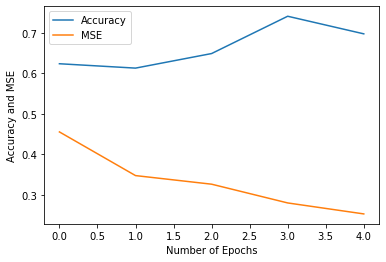

In [7]:
# Importing dataset
from tensorflow.keras.datasets import mnist
(trainX, trainy), (X_test, Y_test) = mnist.load_data()
X_train = trainX[:,:,:]
X_validation = X_test[:,:,:]
Y_train = trainy[:]
Y_validation = Y_test[:]


## Training and Testing Neural Network

# Tunable hyperparameters
max_epoch = 5      # Number of epochs 
eta = 0.8             # Intial learning rate
gamma = 0.7         # Multiplier for the learning rate
stepsize = 1        # Epochs before changing learning rate
threshold = 0.08    # Stopping criteria
test_interval = 1   # Epoch interval for performance measurement
hidden_layer_1_size = 28    # Size of hidden layer 1 
hidden_layer_2_size = 28    # Size of hidden layer 2

performance=[]      # Initializing performance array
MSE=[]              # Initializing MSE array
N = len(X_train)    # Size of the train set
M = len(X_validation)   # Size of the validation/test set
epoch_list=[]           # List to track the epochs

# Creating Neural Network object/model
nn = neuralNetwork(784, 
                   hidden_layer_1_size, 
                   hidden_layer_2_size, 
                   10, 
                   eta)

# Iterating over the each epoch
for epoch in range(max_epoch):
    # Reporting progress
    print("Epoch: ", epoch)
    print("Learning rate: ", nn.lr_info())

    #initializing squared errors
    sse=0
    # shuffling orde of the training set
    order = np.random.permutation(N)

    # Updating learning rate as per given stepsize and gamma
    if epoch%stepsize==0 and epoch!=0:
        nn.lr_update(gamma)

    # Iterating over the length of the training set 
    for i in range(N):
        idx = order[i]

        #flattening 28x28 array to 1D array with size of 784 and normalizing
        flat_input = (X_train[idx].reshape(-1))/255*0.99+0.01

        # Converting numeric targets to a range of 0.01-0.99 values with 1D array
        # with size of 10 (for 0-9 numeric outputs)
        targets = np.zeros(10) + 0.01
        targets[Y_train[idx]]=0.99

        # Training the network
        nn.train(flat_input, targets)

        #Summing the squared errors
        sse+=nn.sse.reshape(-1)[Y_train[idx]]    

    # Checking to see if perfomance check required
    if epoch%test_interval == 0:
        # Appending epoch number to epoch_list
        epoch_list.append(epoch)

        # Calcuclating MSE for the epoch
        MSE.append(sse/N)

        # Getting perofmance (accuracy) for the epoch
        correct_labels=0

        # Checking performance as per given validation/test set
        for i in range(M):
            # Getting the predicted array from the model
            result = nn.predict((X_validation[i].reshape(-1))/255*0.99+0.01)
            # Finding the numeric value (or index) of the predicted label
            label = np.argmax(result)

            if (label==Y_validation[i]):
                correct_labels+=1

        # Calculating and adding the accuracy to the performance list        
        accuracy=correct_labels/M    
        performance.append(accuracy)    
    # Checking to see if MSE reached the minimum threshold       
    if sse/N<=threshold:
        print("Model reached the MSE {0} thershold at epoch {1}".format(threshold,epoch))
        break


# Printing final accuracy value
print("Final accuracy is: ", performance[len(performance)-1])
# Printing MSE value
print("Final MSE is: ", MSE[len(MSE)-1])
plt.plot(epoch_list, performance,label="Accuracy")
plt.plot(epoch_list, MSE, label="MSE")
plt.legend()
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy and MSE")